In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the CNN data
df_cnn_raw = pd.read_json(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\raw_scraped_data\cnn_economic_news.jsonl', lines=True)

# Load the Fox News data
df_fox_raw = pd.read_json(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\raw_scraped_data\fox_news_economic_news.jsonl', lines=True)


In [11]:
df_cnn_raw

,title,date,body,link
0,Sales prices for sports teams are soaring to r...,2025-06-21,The Los Angeles Lakers may not have as many NB...,https://www.cnn.com/2025/06/21/business/sports...
1,Major milestone: US gas prices drop below $3 a...,2025-12-02,"The last time gasoline was this cheap,4% infla...",https://www.cnn.com/2025/12/02/business/gas-pr...
2,"Sorry, America. Coffee prices probably aren’t ...",2025-11-13,A version of this story appeared in CNN Busine...,https://www.cnn.com/2025/11/13/business/coffee...
3,"Gold prices hit $3,000 for the first time as i...",2025-03-14,"Gold prices reached $3,000 an ounce for the fi...",https://www.cnn.com/2025/03/14/investing/gold-...
4,Gold’s frenzied rally ends with largest sell-o...,2025-10-22,Gold prices gained modestly on Wednesday after...,https://www.cnn.com/2025/10/22/investing/gold-...
...,...,...,...,...
625,House Republicans unveil details of Trump tax ...,2025-05-12,House Republicans on Monday unveiled one of th...,https://www.cnn.com/2025/05/12/politics/house-...
626,DOGE proposes cutting IRS workforce by a total...,2025-03-13,The Trump administration and Department of Gov...,https://www.cnn.com/2025/03/13/politics/doge-i...
627,Senate Republicans unveil plan for cuts to Med...,2025-06-16,The GOP-ledSenate Finance Committee on Monday ...,https://www.cnn.com/2025/06/16/politics/medica...
628,From minimum wage increases to Medicare drug c...,2025-01-01,January 1 not only ushered in 2025 but a slew ...,https://www.cnn.com/2025/01/01/politics/new-la...


In [12]:
df_fox_raw

,title,date,body,url
0,House Democrat pushes Senate to reverse Trump ...,2025-12-13,"Mark Ross, president of the St. Paul Police Fe...",https://www.foxnews.com/politics/house-democra...
1,Dem lawmakers cry foul as Hochul guts AI safet...,2025-12-12,Fox News anchor Bret Baier explores how techno...,https://www.foxnews.com/politics/dem-state-law...
2,Gas prices are falling — so why isn’t Trump re...,2025-12-12,Fox News anchor Bret Baier takes a closer look...,https://www.foxnews.com/politics/gas-prices-fa...
3,HUD launches civil rights investigation into B...,2025-12-12,Housing and Urban Development Secretary Scott ...,https://www.foxnews.com/politics/hud-launches-...
4,Trump asks when he'll be credited with creatin...,2025-12-12,White House press secretary Karoline Leavitt h...,https://www.foxnews.com/politics/trump-asks-wh...
...,...,...,...,...
728,DNC chair hopeful Martin O’Malley says Dems wi...,2025-01-03,Former Maryland governor and DNC chair nominee...,https://www.foxnews.com/media/dnc-chair-hopefu...
729,3 ways Trump can deliver an economic 'golden a...,2025-01-03,'Outnumbered' panelists discuss the possible e...,https://www.foxnews.com/opinion/3-ways-trump-c...
730,Trump says he's not changed his mind on H-1B v...,2025-01-02,Columnist David Marcus joins Fox & Friends to ...,https://www.foxnews.com/politics/trump-says-he...
731,Democrats paid the price for abandoning modera...,2025-01-02,Fox News senior congressional correspondent Ch...,https://www.foxnews.com/opinion/democrats-paid...


In [15]:
import pandas as pd

# Load the CNN data
df_cnn_cleaned = pd.read_json(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\analyzed_data\cnn_economic_sentiment.jsonl', lines=True)

# Load the Fox News data
df_fox_cleaned = pd.read_json(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\analyzed_data\fox_news_economic_sentiment.jsonl', lines=True)



In [16]:
df_cnn_cleaned

,title,date,body,link,is_economy,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Sales prices for sports teams are soaring to r...,2025-06-21,The Los Angeles Lakers may not have as many NB...,https://www.cnn.com/2025/06/21/business/sports...,True,1,1,0,1,0,1,0,0
1,Major milestone: US gas prices drop below $3 a...,2025-12-02,"The last time gasoline was this cheap,4% infla...",https://www.cnn.com/2025/12/02/business/gas-pr...,True,1,1,1,1,0,1,1,0
2,"Sorry, America. Coffee prices probably aren’t ...",2025-11-13,A version of this story appeared in CNN Busine...,https://www.cnn.com/2025/11/13/business/coffee...,True,0,1,1,0,1,1,1,0
3,"Gold prices hit $3,000 for the first time as i...",2025-03-14,"Gold prices reached $3,000 an ounce for the fi...",https://www.cnn.com/2025/03/14/investing/gold-...,True,0,1,1,0,0,0,0,0
4,Gold’s frenzied rally ends with largest sell-o...,2025-10-22,Gold prices gained modestly on Wednesday after...,https://www.cnn.com/2025/10/22/investing/gold-...,True,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Trump admin hones strategy to sell voters on m...,2025-08-21,President Donald Trump loves to boast about th...,https://www.cnn.com/2025/08/21/politics/trump-...,True,0,0,1,0,0,0,0,0
469,Trump is counting on economic growth to offset...,2025-06-17,President Donald Trump and congressional Repub...,https://www.cnn.com/2025/06/17/politics/big-be...,True,0,0,1,0,1,1,1,0
470,House Republicans unveil details of Trump tax ...,2025-05-12,House Republicans on Monday unveiled one of th...,https://www.cnn.com/2025/05/12/politics/house-...,True,0,0,1,0,0,1,0,0
471,Senate Republicans unveil plan for cuts to Med...,2025-06-16,The GOP-ledSenate Finance Committee on Monday ...,https://www.cnn.com/2025/06/16/politics/medica...,True,0,0,1,0,1,1,1,0


In [17]:
df_fox_cleaned

,title,date,body,url,is_economy,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Dem lawmakers cry foul as Hochul guts AI safet...,2025-12-12,Fox News anchor Bret Baier explores how techno...,https://www.foxnews.com/politics/dem-state-law...,True,0,0,0,0,1,1,0,0
1,Gas prices are falling — so why isn’t Trump re...,2025-12-12,Fox News anchor Bret Baier takes a closer look...,https://www.foxnews.com/politics/gas-prices-fa...,True,0,1,1,0,1,1,1,0
2,Trump asks when he'll be credited with creatin...,2025-12-12,White House press secretary Karoline Leavitt h...,https://www.foxnews.com/politics/trump-asks-wh...,True,1,1,1,1,1,1,1,0
3,Leavitt accuses CNN reporter of trying to 'pus...,2025-12-11,White House press secretary Karoline Leavitt h...,https://www.foxnews.com/politics/leavitt-accus...,True,0,1,1,0,0,1,0,0
4,Cotton moves to loosen rules to boost supply o...,2025-12-10,Fox News White House correspondent Aishah Hasn...,https://www.foxnews.com/politics/cotton-moves-...,True,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Bernie Sanders hits out at H-1B visa program f...,2025-01-04,Columnist David Marcus joins ‘FOX & Friends’ t...,https://www.foxnews.com/politics/bernie-sander...,True,0,0,0,0,1,0,0,0
452,Washington state Democrats accidentally email ...,2025-01-03,Salon owner Zazel Wu joins ‘Fox News @ Night’ ...,https://www.foxnews.com/politics/washington-st...,True,0,0,1,0,0,1,0,0
453,DNC chair hopeful Martin O’Malley says Dems wi...,2025-01-03,Former Maryland governor and DNC chair nominee...,https://www.foxnews.com/media/dnc-chair-hopefu...,True,0,1,0,0,0,0,0,0
454,3 ways Trump can deliver an economic 'golden a...,2025-01-03,'Outnumbered' panelists discuss the possible e...,https://www.foxnews.com/opinion/3-ways-trump-c...,True,1,0,1,0,1,0,1,0


In [18]:
df_cnn_cleaned["source"] = "CNN"
df_fox_cleaned["source"] = "Fox"

In [19]:
df = pd.concat([df_cnn_cleaned, df_fox_cleaned], ignore_index=True)

### Overall sentiment comparison

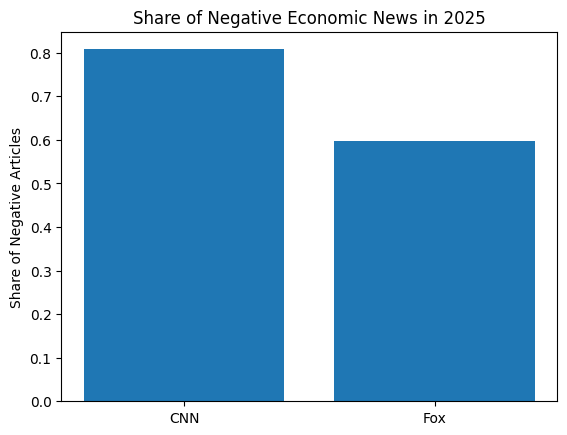

In [21]:
sentiment_share = (
    df.groupby("source")["sentiment"]
      .mean()
      .reset_index()
)
sentiment_share["negative_share"] = 1 - sentiment_share["sentiment"]

plt.bar(sentiment_share["source"], sentiment_share["negative_share"])
plt.ylabel("Share of Negative Articles")
plt.title("Share of Negative Economic News in 2025")
plt.show()

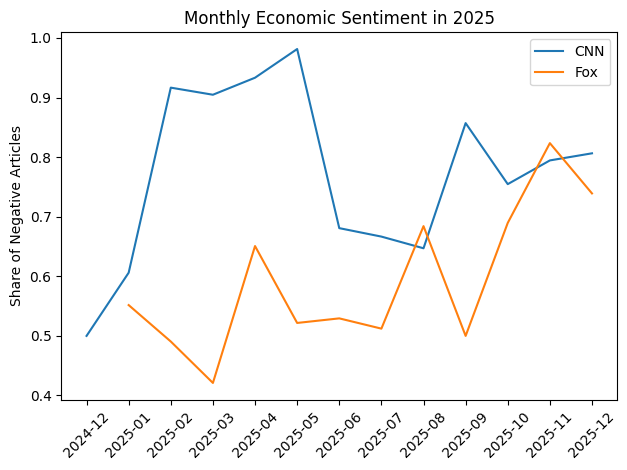

In [24]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

monthly_sentiment = (
    df.groupby(["month", "source"])["sentiment"]
      .mean()
      .reset_index()
)
monthly_sentiment["negative_share"] = 1 - monthly_sentiment["sentiment"]

for src in monthly_sentiment["source"].unique():
    temp = monthly_sentiment[monthly_sentiment["source"] == src]
    plt.plot(temp["month"].astype(str), temp["negative_share"], label=src)

plt.xticks(rotation=45)
plt.ylabel("Share of Negative Articles")
plt.title("Monthly Economic Sentiment in 2025")
plt.legend()
plt.tight_layout()
plt.show()

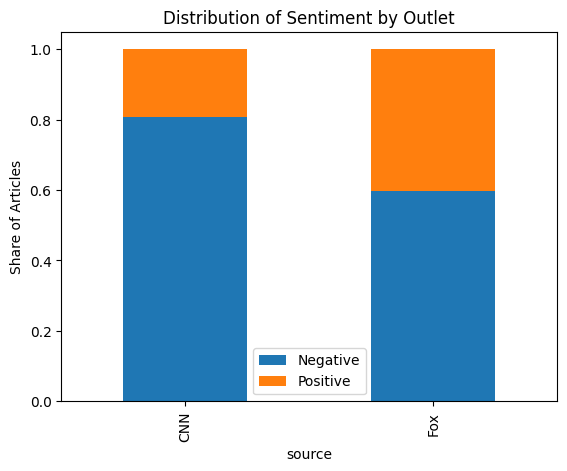

In [25]:
dist = (
    df.groupby(["source", "sentiment"])
      .size()
      .unstack()
      .fillna(0)
)
dist = dist.div(dist.sum(axis=1), axis=0)

dist.plot(kind="bar", stacked=True)
plt.ylabel("Share of Articles")
plt.title("Distribution of Sentiment by Outlet")
plt.legend(["Negative", "Positive"])
plt.show()

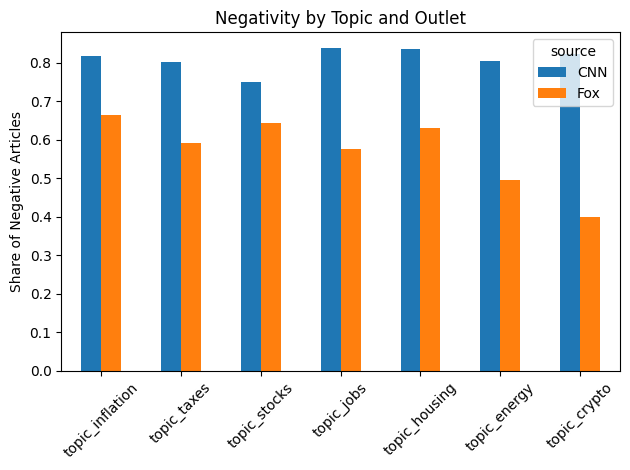

In [26]:
topics = [
    "topic_inflation", "topic_taxes", "topic_stocks",
    "topic_jobs", "topic_housing", "topic_energy", "topic_crypto"
]

topic_results = []

for t in topics:
    temp = df[df[t] == 1]
    res = temp.groupby("source")["sentiment"].mean()
    topic_results.append(res)

topic_df = pd.concat(topic_results, axis=1)
topic_df.columns = topics
topic_df = 1 - topic_df  # convert to negative share

topic_df.T.plot(kind="bar")
plt.ylabel("Share of Negative Articles")
plt.title("Negativity by Topic and Outlet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()